In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\Dominik\Desktop\Studia\Programowanie dla analityki danych\Data_extremism.csv'
df = pd.read_csv(path)

target = df['class']
inputs = df[df.columns.difference(['class'])]

train_input, test_input, train_target, test_target = train_test_split(inputs, target, test_size=0.2)

In [2]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
nb = GaussianNB()

dt.fit(train_input, train_target)
lr.fit(train_input, train_target)
nb.fit(train_input, train_target)

GaussianNB()

In [3]:
pred_dt = dt.predict(test_input)
pred_lr = lr.predict(test_input)
pred_nb = nb.predict(test_input)
pred_dt

array(['extremism', 'neutral', 'extremism', 'extremism', 'extremism',
       'neutral', 'neutral', 'neutral', 'extremism', 'extremism',
       'neutral', 'neutral', 'neutral', 'extremism', 'extremism',
       'neutral', 'neutral', 'extremism', 'extremism', 'extremism'],
      dtype=object)

In [4]:
#precyzja
prec_extreme_dt = round(precision_score(test_target, pred_dt, pos_label="extremism"), 2)
prec_neutral_dt = round(precision_score(test_target, pred_dt, pos_label="neutral"), 2)
prec_extreme_lr = round(precision_score(test_target, pred_lr, pos_label="extremism"), 2)
prec_neutral_lr = round(precision_score(test_target, pred_lr, pos_label="neutral"), 2)
prec_extreme_nb = round(precision_score(test_target, pred_nb, pos_label="extremism"), 2)
prec_neutral_nb = round(precision_score(test_target, pred_nb, pos_label="neutral"), 2)

#recall
rec_extreme_dt = round(recall_score(test_target, pred_dt, pos_label="extremism"), 2)
rec_neutral_dt = round(recall_score(test_target, pred_dt, pos_label="neutral"), 2)
rec_extreme_lr = round(recall_score(test_target, pred_lr, pos_label="extremism"), 2)
rec_neutral_lr = round(recall_score(test_target, pred_lr, pos_label="neutral"), 2)
rec_extreme_nb = round(recall_score(test_target, pred_nb, pos_label="extremism"), 2)
rec_neutral_nb = round(recall_score(test_target, pred_nb, pos_label="neutral"), 2)

#accuracy
acc_dt = round(accuracy_score(test_target, pred_dt), 2)
acc_lr = round(accuracy_score(test_target, pred_lr), 2)
acc_nb = round(accuracy_score(test_target, pred_nb), 2)

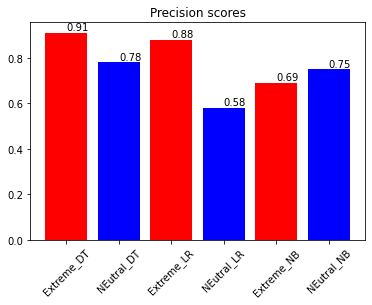

In [5]:
plt.bar(height= [prec_extreme_dt, prec_neutral_dt, prec_extreme_lr, prec_neutral_lr, prec_extreme_nb, prec_neutral_nb],
       x=["Extreme_DT", "NEutral_DT", "Extreme_LR", "NEutral_LR", "Extreme_NB", "NEutral_NB"],
       color=['red','blue'])
plt.title("Precision scores")
plt.xticks(rotation=45)
results= [prec_extreme_dt, prec_neutral_dt, prec_extreme_lr, prec_neutral_lr, prec_extreme_nb, prec_neutral_nb]
for i in range(0,6):
    plt.text(x=i, y=results[i]+0.01,s=results[i])
plt.show()

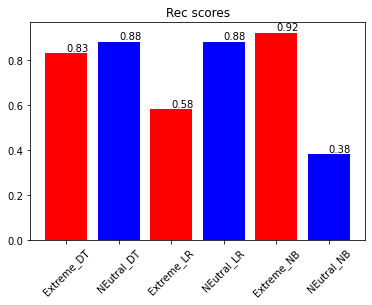

In [6]:
plt.bar(height= [rec_extreme_dt, rec_neutral_dt, rec_extreme_lr, rec_neutral_lr, rec_extreme_nb, rec_neutral_nb],
       x=["Extreme_DT", "NEutral_DT", "Extreme_LR", "NEutral_LR", "Extreme_NB", "NEutral_NB"],
       color=['red','blue'])
plt.title("Rec scores")
plt.xticks(rotation=45)
results= [rec_extreme_dt, rec_neutral_dt, rec_extreme_lr, rec_neutral_lr, rec_extreme_nb, rec_neutral_nb]
for i in range(0,6):
    plt.text(x=i, y=results[i]+0.01,s=results[i])
plt.show()

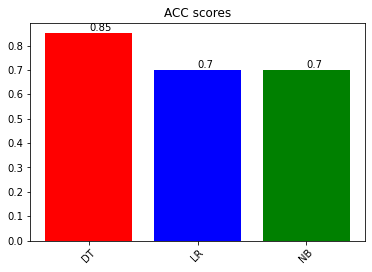

In [7]:
plt.bar(height= [acc_dt, acc_lr, acc_nb], 
       x=["DT", "LR", "NB"],
       color=['red','blue', 'green'])
plt.title("ACC scores")
plt.xticks(rotation=45)
results= [acc_dt, acc_lr, acc_nb]
for i in range(0,3):
    plt.text(x=i, y=results[i]+0.01,s=results[i])
plt.show()

In [8]:
from sklearn.cluster import KMeans

path = r'C:\Users\Dominik\Desktop\Studia\Programowanie dla analityki danych\2_Mall_Customers.csv'
df = pd.read_csv(path)

In [9]:
df= df.drop(columns=['CustomerID'])

In [10]:
def recode(x):
    if x == "Female":
        return 1 
    else:
        return 0
    
df['Gender'] = df['Gender'].apply(recode)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [11]:
km = KMeans(n_clusters=2)
km.fit(df)
new_df = df.copy()
new_df['labels'] = km.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [12]:
pd.DataFrame(km.cluster_centers_, columns =df.keys())

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.565217,46.165217,59.365217,32.886957
1,0.552941,28.952941,62.176471,73.623529
